In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tifffile

import bebi103

import bokeh.io
notebook_url = 'localhost:8888'
bokeh.io.output_notebook()

import os
import sys
from imp import reload
import gbeflow

Loading BokehJS ...

# Import data

In [2]:
names = ['20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt',
 '20180108_htl_glc_sc11_mmzm_rotate_brt',
 '20180110_htl_glc_sc6_mmzm_rotate_brt',
 '20180110_htl_glc_sc15_mmzm_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt',
 '20180108_htl_glc_sc9_mmzp_rotate_brt',
 '20180112_htlglc_tl_sc11_mmzp_rotate_brt',
 '20180108_htl_glc_sc2_mmzm_wp_rotate_brt',
 '20180110_htl_glc_sc14_mmzp_rotate_brt',
 '20180112_htlglc_tl_sc4_resille_rotate_brt',
 '20180112_htlglc_tl_sc19_mmzp_rotate_brt']

In [3]:
dfs = {}
arrs = {}
for name in names:
    try:
        df = gbeflow.tidy_vector_data(name)
        dfs[name] = df
        tt,xx,yy,vx,vy = gbeflow.reshape_vector_data(df)
        arrs[name] = {'tt':tt,
                     'xx':xx,
                     'yy':yy,
                     'vx':vx,
                     'vy':vy}
    except:
        e = sys.exc_info()
        print(name,'not available')
        print(e)

/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


20180112_htlglc_tl_sc19_mmzp_rotate_brt not available
(<class 'FileNotFoundError'>, FileNotFoundError("File b'20180112_htlglc_tl_sc19_mmzp_rotate_brt_X.csv' does not exist",), <traceback object at 0x101f42a88>)


In [10]:
arrs

{'20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt': {'tt': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[1, 1, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 1, 1, 1],
          ...,
          [1, 1, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 1, 1, 1]],
  
         [[2, 2, 2, ..., 2, 2, 2],
          [2, 2, 2, ..., 2, 2, 2],
          [2, 2, 2, ..., 2, 2, 2],
          ...,
          [2, 2, 2, ..., 2, 2, 2],
          [2, 2, 2, ..., 2, 2, 2],
          [2, 2, 2, ..., 2, 2, 2]],
  
         ...,
  
         [[163, 163, 163, ..., 163, 163, 163],
          [163, 163, 163, ..., 163, 163, 163],
          [163, 163, 163, ..., 163, 163, 163],
          ...,
          [163, 163, 163, ..., 163, 163, 163],
          [163, 163, 163, 

In [5]:
hsts = {}
for name in arrs.keys():
    path = os.path.join('../data',name+'.tif')
    print(path)
#     hsts[name] = gbeflow.read_hyperstack(path)
    hsts[name] = tifffile.imread(path)

../data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif
../data/20180108_htl_glc_sc11_mmzm_rotate_brt.tif
../data/20180110_htl_glc_sc6_mmzm_rotate_brt.tif
../data/20180110_htl_glc_sc15_mmzm_rotate_brt.tif
../data/20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt.tif
../data/20180108_htl_glc_sc9_mmzp_rotate_brt.tif
../data/20180112_htlglc_tl_sc11_mmzp_rotate_brt.tif
../data/20180108_htl_glc_sc2_mmzm_wp_rotate_brt.tif
../data/20180110_htl_glc_sc14_mmzp_rotate_brt.tif
../data/20180112_htlglc_tl_sc4_resille_rotate_brt.tif


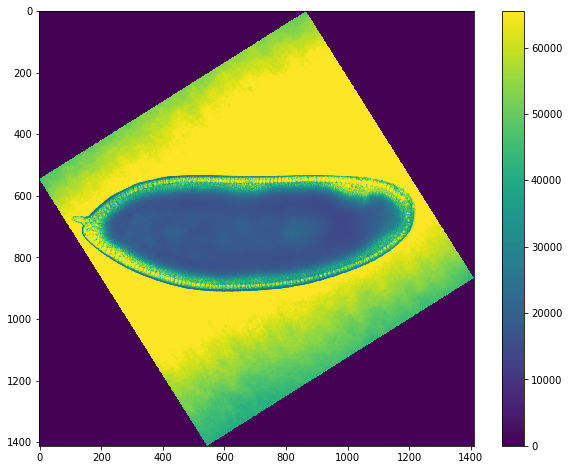

In [6]:
gbeflow.imshow(hsts[name][30])

# Look at some quiver plots

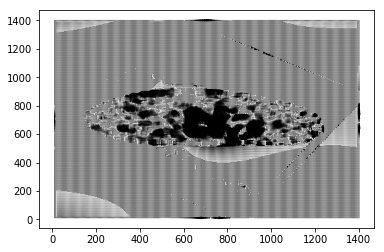

In [7]:
fig,ax = plt.subplots()
t = 100
plt.quiver(arrs[name]['xx'][t],arrs[name]['yy'][t],arrs[name]['vx'][t],arrs[name]['vy'][t])

# Pick start point for interpolation

In [9]:
import scipy.interpolate as itp

In [21]:
f = names[1]

In [26]:
p = bebi103.viz.record_clicks(hsts[f][0],notebook_url=notebook_url,flip=False)

In [28]:
starts = p.to_df()

In [29]:
starts.head()

,x,y
0,1100.080253,589.439632
1,1060.184808,545.501094
2,1032.221742,600.399676
3,1084.490923,653.499688
4,1079.888209,609.884330


# Try interpolation with `RectBivariateSpline`

class scipy.interpolate.RectBivariateSpline(x, y, z, bbox=[None, None, None, None], kx=3, ky=3, s=0)[source]
Bivariate spline approximation over a rectangular mesh.

Can be used for both smoothing and interpolating data.

Parameters:	
x,y : array_like

1-D arrays of coordinates in strictly ascending order.

z : array_like

2-D array of data with shape (x.size,y.size).

bbox : array_like, optional

Sequence of length 4 specifying the boundary of the rectangular approximation domain. By default, bbox=[min(x,tx),max(x,tx), min(y,ty),max(y,ty)].

kx, ky : ints, optional

Degrees of the bivariate spline. Default is 3.

s : float, optional

Positive smoothing factor defined for estimation condition: sum((w[i]*(z[i]-s(x[i], y[i])))**2, axis=0) <= s Default is s=0, which is for interpolation.

In [30]:
arr = arrs[f]

It might be helpful to create an object to hold and manage vector data

In [32]:
x = np.unique(arr['xx'])
y = np.unique(arr['yy'])
vx = arr['vx']
vy = arr['vy']

In [33]:
x,y

(array([  11,   16,   21,   26,   31,   36,   41,   46,   51,   56,   61,
          66,   71,   76,   81,   86,   91,   96,  101,  106,  111,  116,
         121,  126,  131,  136,  141,  146,  151,  156,  161,  166,  171,
         176,  181,  186,  191,  196,  201,  206,  211,  216,  221,  226,
         231,  236,  241,  246,  251,  256,  261,  266,  271,  276,  281,
         286,  291,  296,  301,  306,  311,  316,  321,  326,  331,  336,
         341,  346,  351,  356,  361,  366,  371,  376,  381,  386,  391,
         396,  401,  406,  411,  416,  421,  426,  431,  436,  441,  446,
         451,  456,  461,  466,  471,  476,  481,  486,  491,  496,  501,
         506,  511,  516,  521,  526,  531,  536,  541,  546,  551,  556,
         561,  566,  571,  576,  581,  586,  591,  596,  601,  606,  611,
         616,  621,  626,  631,  636,  641,  646,  651,  656,  661,  666,
         671,  676,  681,  686,  691,  696,  701,  706,  711,  716,  721,
         726,  731,  736,  741,  746, 

In [35]:
tvx = itp.RectBivariateSpline(x,y,vx[1])
tvx.ev(starts.iloc[0].x,starts.iloc[1].y)

array(-0.12185898)

# Use gbeflow function for interpolation

In [36]:
track = gbeflow.calc_flow_path(x,y,vx,vy,starts.iloc[0].x,starts.iloc[1].y)

100%|██████████| 165/165 [00:01<00:00, 88.81it/s] 


In [38]:
track.shape

(2, 166)

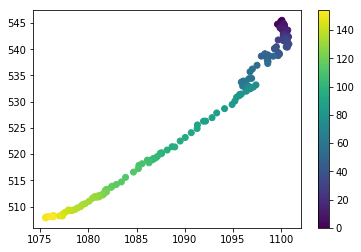

In [42]:
fig,ax = plt.subplots()
cax = ax.scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
plt.colorbar(cax)

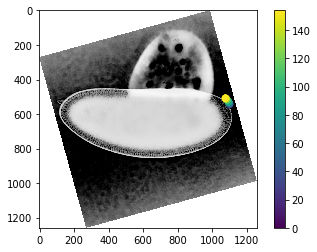

In [44]:
fig,ax = plt.subplots()
ax.imshow(hsts[f][0],cmap='Greys')
cax = ax.scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
plt.colorbar(cax)

# Try all start points

In [45]:
Ltrack = []
for start in zip(starts.x,starts.y):
    Ltrack.append(gbeflow.calc_flow_path(x,y,vx,vy,start[0],start[1]))

100%|██████████| 165/165 [00:01<00:00, 157.05it/s]


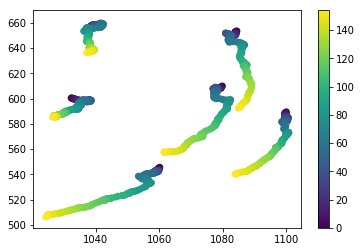

In [46]:
fig,ax = plt.subplots()
for track in Ltrack:
    cax = ax.scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
plt.colorbar(cax)

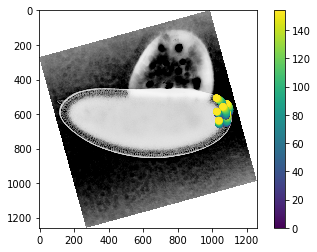

In [47]:
fig,ax = plt.subplots()
ax.imshow(hsts[f][0],cmap='Greys')
for track in Ltrack:
    cax = ax.scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
plt.colorbar(cax)

# Try running optical flow with a variety of t values

In [48]:
import glob
import tqdm
import matlab.engine

In [50]:
f = '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt'

In [51]:
eng = matlab.engine.start_matlab()
eng.addpath(r'../matlab',nargout=0)

In [52]:
BinaryMask = matlab.single([])
scale = 0.5
BoxSize = 30
BlurSTD = 1.0 # Must be float
ArrowSize= 5

In [60]:
# Ldt = [0.1,0.5,1,2,5,10]
Ldt = [1.0,2.0,5.0,10.0]

In [61]:
for dt in Ldt:
    f = '/Users/morganschwartz/Code/germband-extension/data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif'
    name = f+'_'+str(dt)
    eng.OpticalFlowOutput(name,f,BinaryMask,BoxSize,BlurSTD,ArrowSize,scale,dt,nargout=0)
    print(name)

/Users/morganschwartz/Code/germband-extension/data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif_1.0
/Users/morganschwartz/Code/germband-extension/data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif_2.0
/Users/morganschwartz/Code/germband-extension/data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif_5.0
/Users/morganschwartz/Code/germband-extension/data/20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt.tif_10.0


ERROR:tornado.application:Uncaught exception GET /autoload.js?bokeh-autoload-element=2210&bokeh-absolute-url=http://localhost:58662&resources=none (::1)
HTTPServerRequest(protocol='http', host='localhost:58662', method='GET', uri='/autoload.js?bokeh-autoload-element=2210&bokeh-absolute-url=http://localhost:58662&resources=none', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/tornado/web.py", line 1592, in _execute
    result = yield result
  File "/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/tornado/gen.py", line 1133, in run
    value = future.result()
  File "/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/tornado/gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bokeh/server/views/autoload_js_handler.py", line 26, in get
    s

# Load variable t data

In [64]:
tarrs = {}
for dt in Ldt:
    name = f+'_'+str(dt)
    df = gbeflow.tidy_vector_data(name)
    tt,xx,yy,vx,vy = gbeflow.reshape_vector_data(df)
    tarrs[dt] = {'tt':tt,
                     'xx':xx,
                     'yy':yy,
                     'vx':vx,
                     'vy':vy}

# Calculate tracks for previous start points

In [65]:
Dtrack = {}
for dt in Ldt:
    Dtrack[dt] = []
    x = np.unique(tarrs[dt]['xx'])
    y = np.unique(tarrs[dt]['yy'])
    vx = tarrs[dt]['vx']
    vy = tarrs[dt]['vy']
    for start in zip(starts.x,starts.y):
        Dtrack[dt].append(
            gbeflow.calc_flow_path(x,y,vx,vy,start[0],start[1])
        )

100%|██████████| 165/165 [00:00<00:00, 211.91it/s]


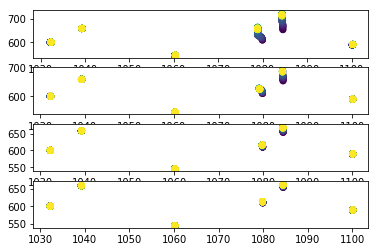

In [68]:
fig,ax = plt.subplots(len(Ldt))
for i,dt in enumerate(Ldt):
    for track in Dtrack[dt]:
        ax[i].scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
#         ax[i].set_aspect('equal')